In [22]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
results=pd.read_csv('election_results')

In [24]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Party    42 non-null     object
 1   Won      42 non-null     int64 
 2   Leading  42 non-null     int64 
 3   Total    42 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.4+ KB


In [43]:
results.head()

,Party,Won,Leading,Total
0,Bharatiya Janata Party - BJP,240,0,240
1,Indian National Congress - INC,99,0,99
2,Samajwadi Party - SP,37,0,37
3,All India Trinamool Congress - AITC,29,0,29
4,Dravida Munnetra Kazhagam - DMK,22,0,22


# Vertical Plot

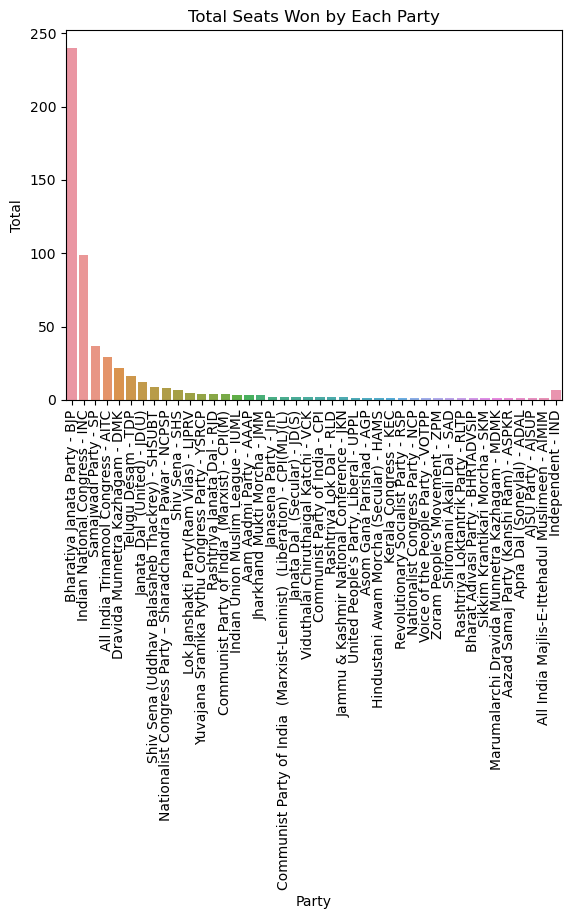

<Figure size 2800x2600 with 0 Axes>

In [34]:
results['Total'] = pd.to_numeric(results['Total'], errors='coerce')
sns.barplot(x='Party', y='Total', data=results,orient='v')
plt.xticks(rotation=90)
plt.title('Total Seats Won by Each Party')
plt.figure(figsize=(28, 26))
plt.show()

# Horizontal Plot

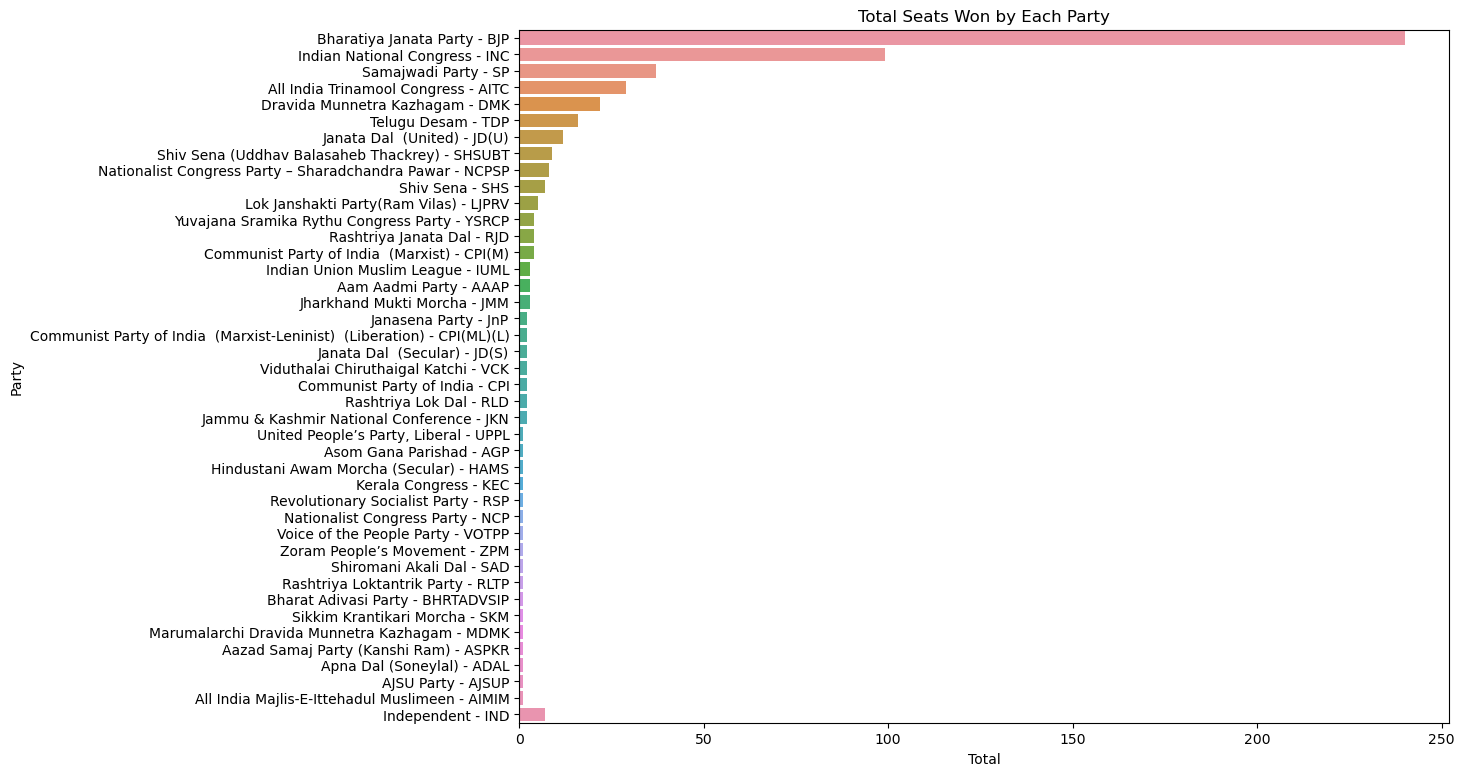

In [35]:
results['Total'] = pd.to_numeric(results['Total'], errors='coerce')
plt.figure(figsize=(12, 9))
sns.barplot(y='Party', x='Total', data=results, orient='h')
plt.title('Total Seats Won by Each Party')
plt.show()


# Pie Chart

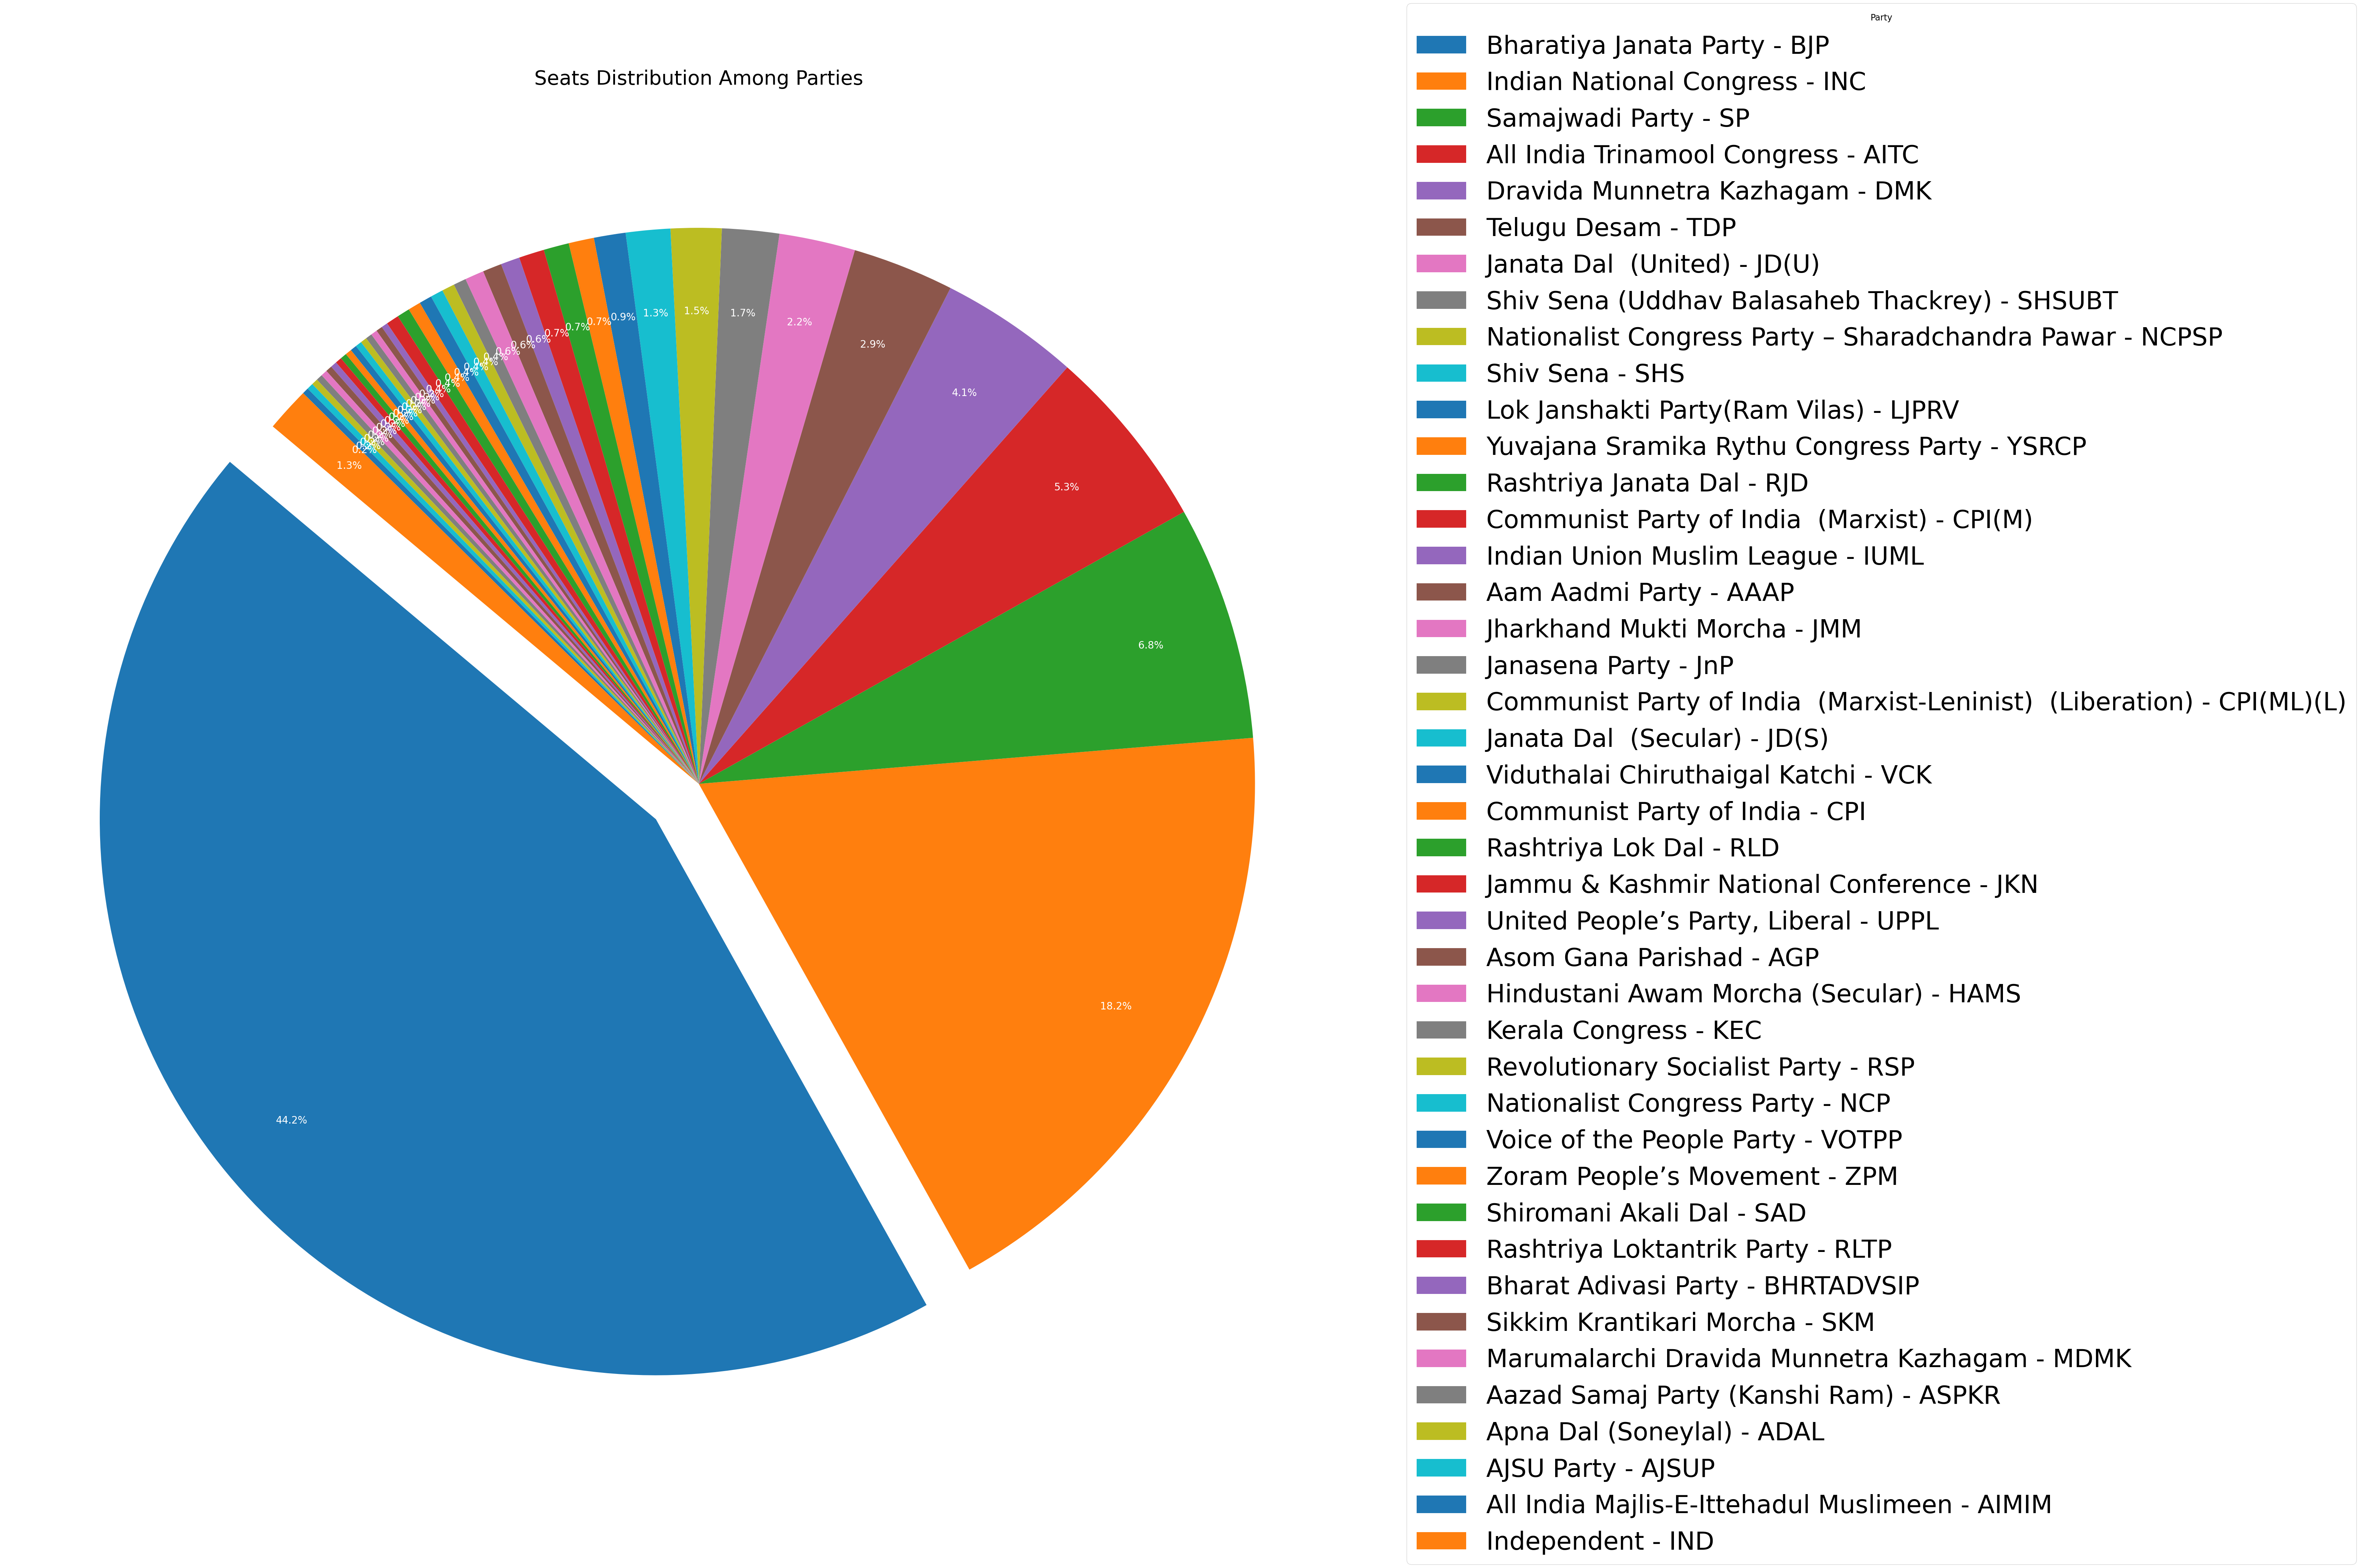

In [37]:
results['Total'] = pd.to_numeric(results['Total'], errors='coerce')
plt.figure(figsize=(50, 70))
explode = [0.1 if i == 0 else 0 for i in range(len(results))]  # Slightly explode the first slice
pie, _, autotexts = plt.pie(
    results['Total'], 
    labels=None,  # No labels on the slices
    autopct='%1.1f%%',
    explode=explode,
    startangle=140,
    pctdistance=0.85,  
    textprops={'fontsize': 30}  
)
for autotext in autotexts:
    autotext.set_fontsize(20)
    autotext.set_color('white')  
plt.title('Seats Distribution Among Parties', fontsize=40)
plt.ylabel('')  
plt.legend(
    results['Party'], 
    loc="center left", 
    bbox_to_anchor=(1, 0.5), 
    fontsize='xx-large', 
    title="Party", 
    title_fontsize='xx-large',
    prop={'size': 50}
)
plt.show()

# Party with highest and lowest votes

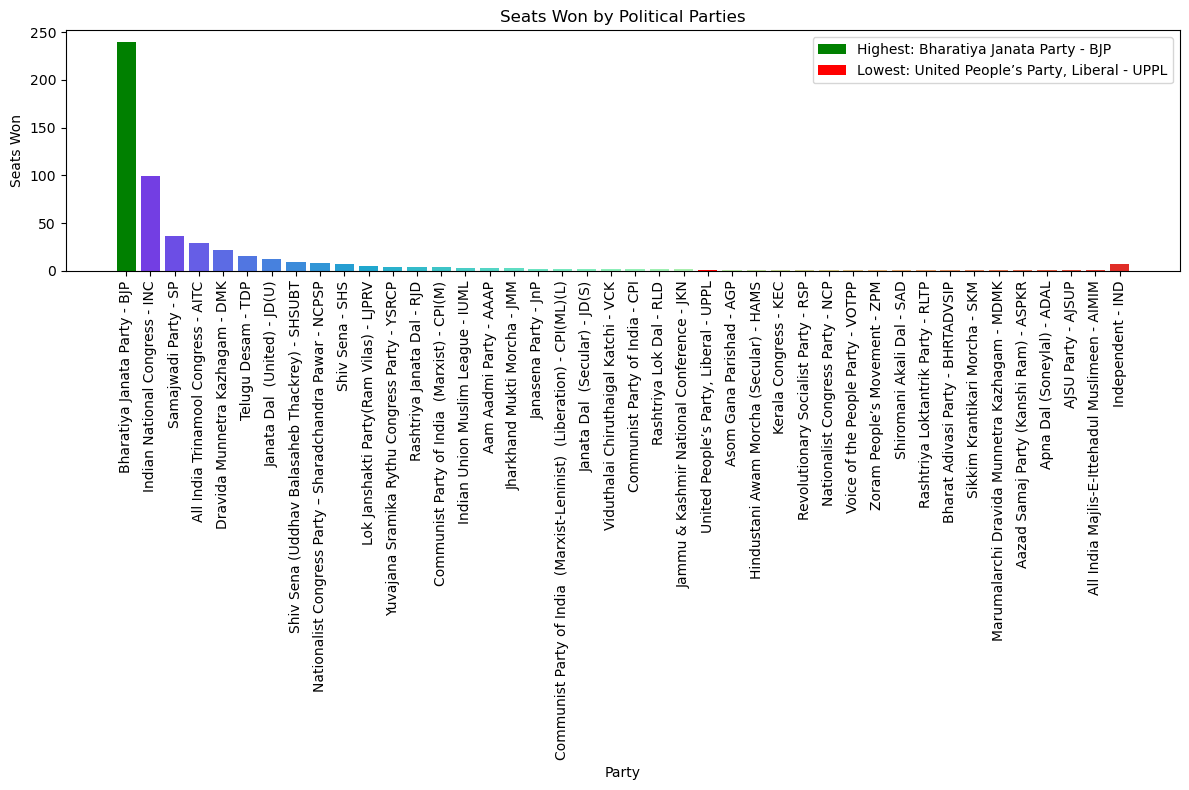

In [39]:
party_highest = results.loc[results['Won'].idxmax(), 'Party']
party_lowest = results.loc[results['Won'].idxmin(), 'Party']
plt.figure(figsize=(12, 8))
sns.barplot(x='Party', y='Won', data=results, palette='rainbow')
plt.bar(results[results['Party'] == party_highest].index, 
        results[results['Party'] == party_highest]['Won'],
        color='green', label=f'Highest: {party_highest}')
plt.bar(results[results['Party'] == party_lowest].index, 
        results[results['Party'] == party_lowest]['Won'],
        color='red', label=f'Lowest: {party_lowest}')
plt.xticks(rotation=90)  
plt.xlabel('Party')
plt.ylabel('Seats Won')
plt.title('Seats Won by Political Parties')
plt.legend()
plt.tight_layout()
plt.show()


# Top 10 Parties

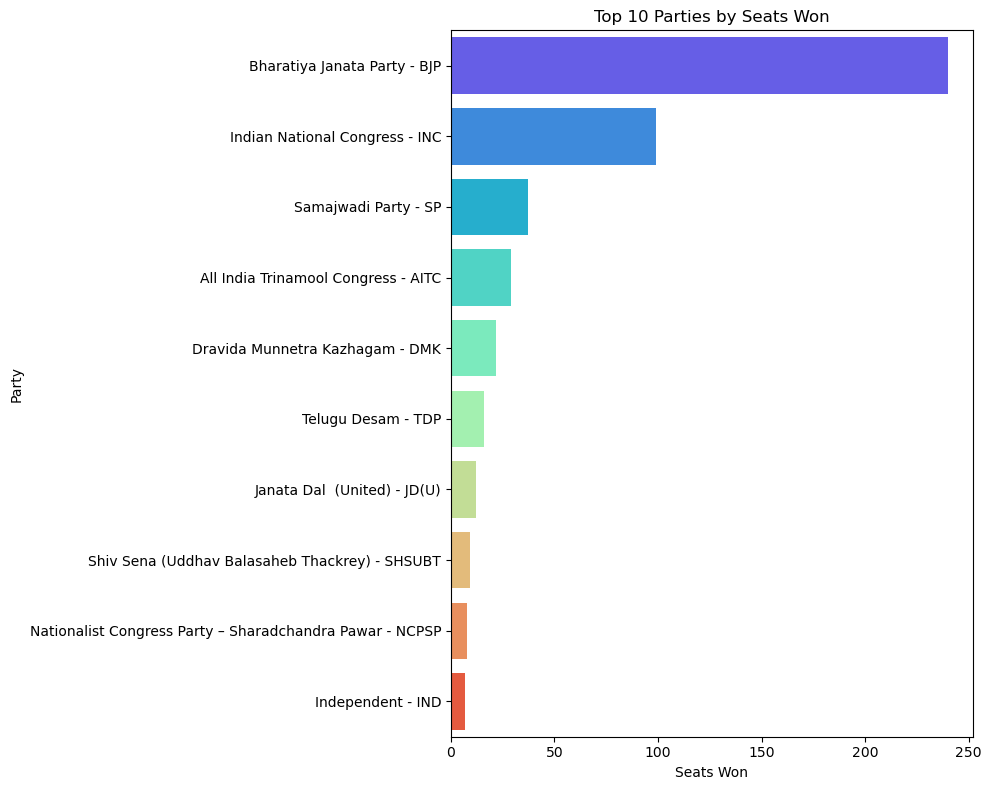

In [40]:
top_10_parties = results.sort_values(by='Won', ascending=False).head(10)
plt.figure(figsize=(10, 8))
sns.barplot(x='Won', y='Party', data=top_10_parties, palette='rainbow', orient='h')
plt.xlabel('Seats Won')
plt.ylabel('Party')
plt.title('Top 10 Parties by Seats Won')
plt.tight_layout()
plt.show()

# Bottom 10 Parties

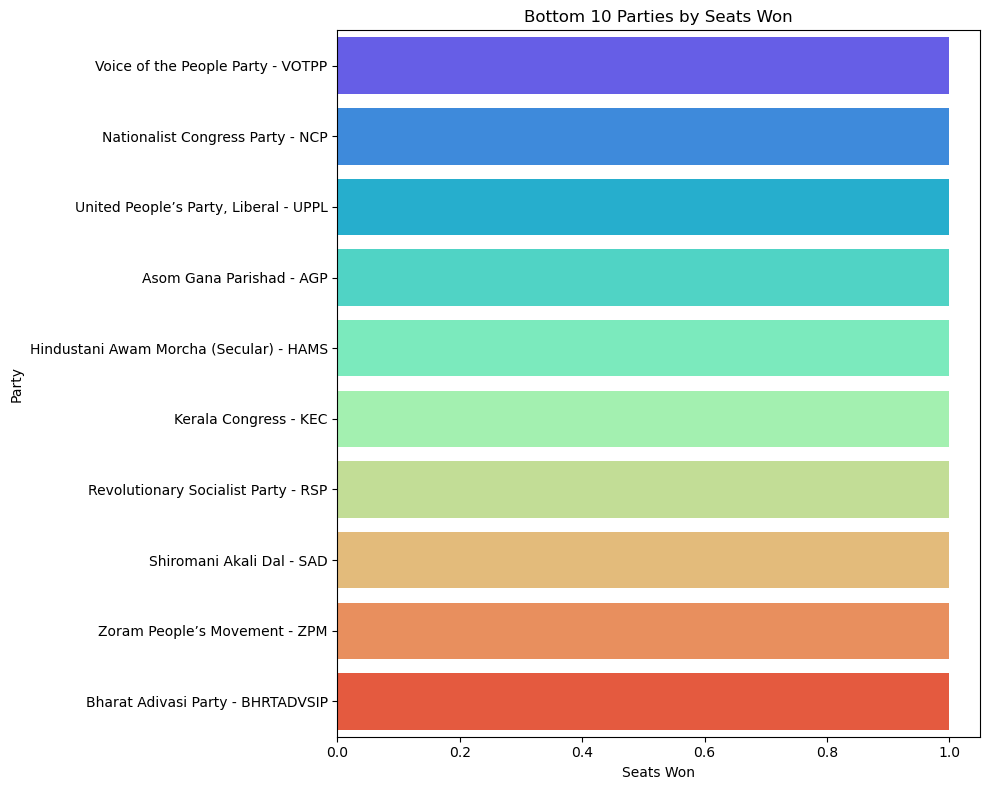

In [41]:
bottom_10_parties = results.sort_values(by='Won').head(10)
plt.figure(figsize=(10, 8))
sns.barplot(x='Won', y='Party', data=bottom_10_parties, palette='rainbow', orient='h')
plt.xlabel('Seats Won')
plt.ylabel('Party')
plt.title('Bottom 10 Parties by Seats Won')
plt.tight_layout()
plt.show()

# Heatmaps decribed by intensity scale

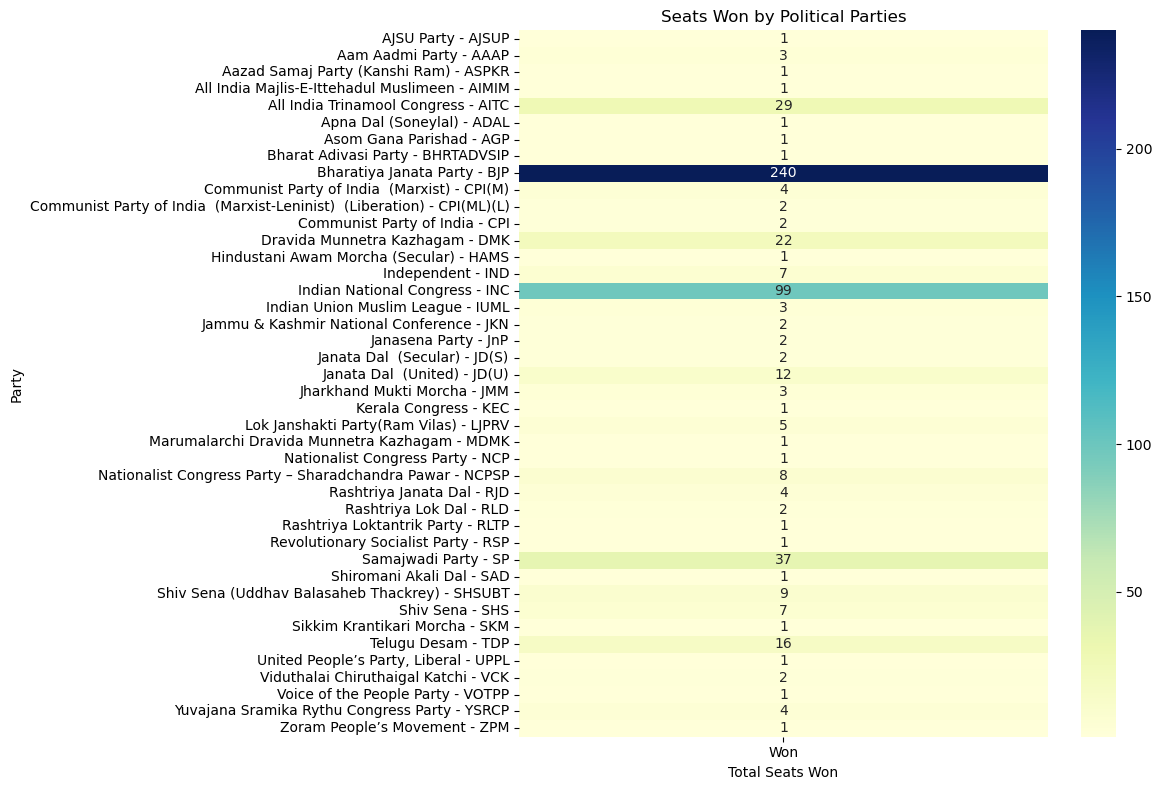

In [42]:
heatmap_data = results.pivot_table(index='Party', values='Won', aggfunc='sum')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='g')

plt.xlabel('Total Seats Won')
plt.ylabel('Party')
plt.title('Seats Won by Political Parties')
plt.tight_layout()
plt.show()


# Violin Plot

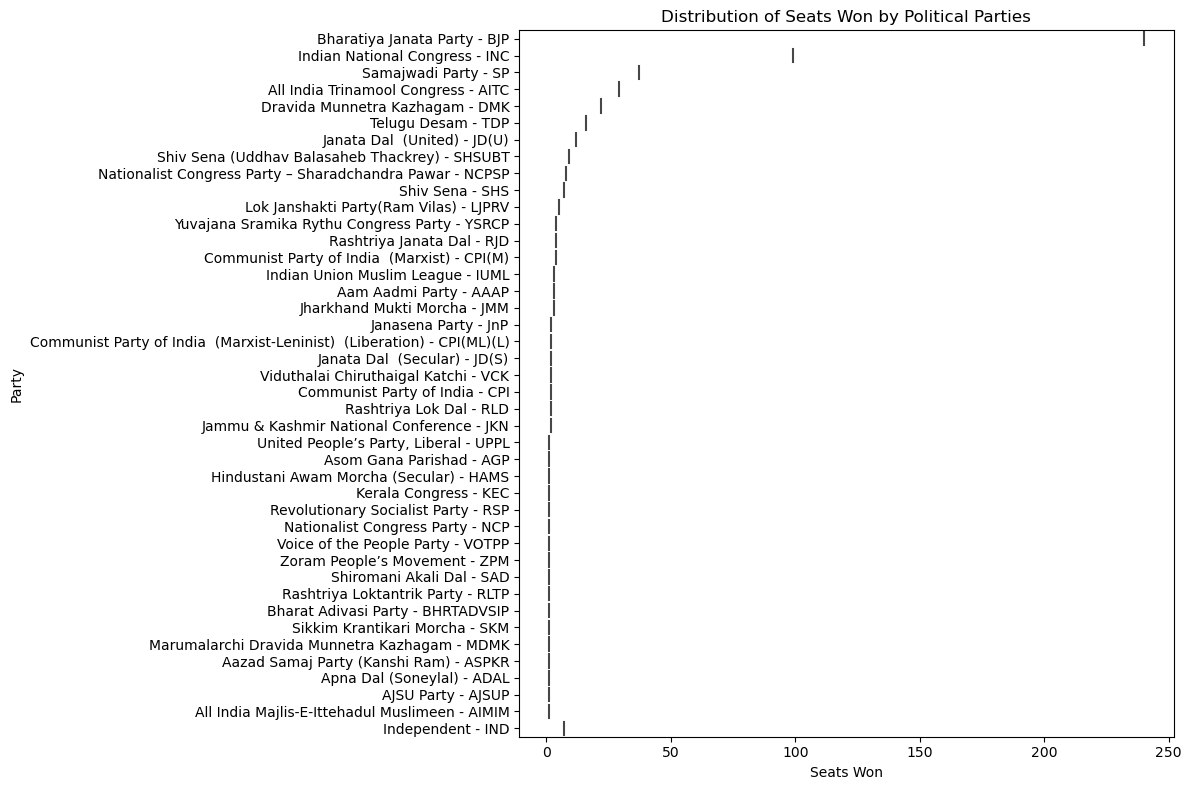

In [44]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='Won', y='Party', data=results, palette='rainbow')
plt.xlabel('Seats Won')
plt.ylabel('Party')
plt.title('Distribution of Seats Won by Political Parties')
plt.tight_layout()
plt.show()


# Countplot (Number of parties by seats won)

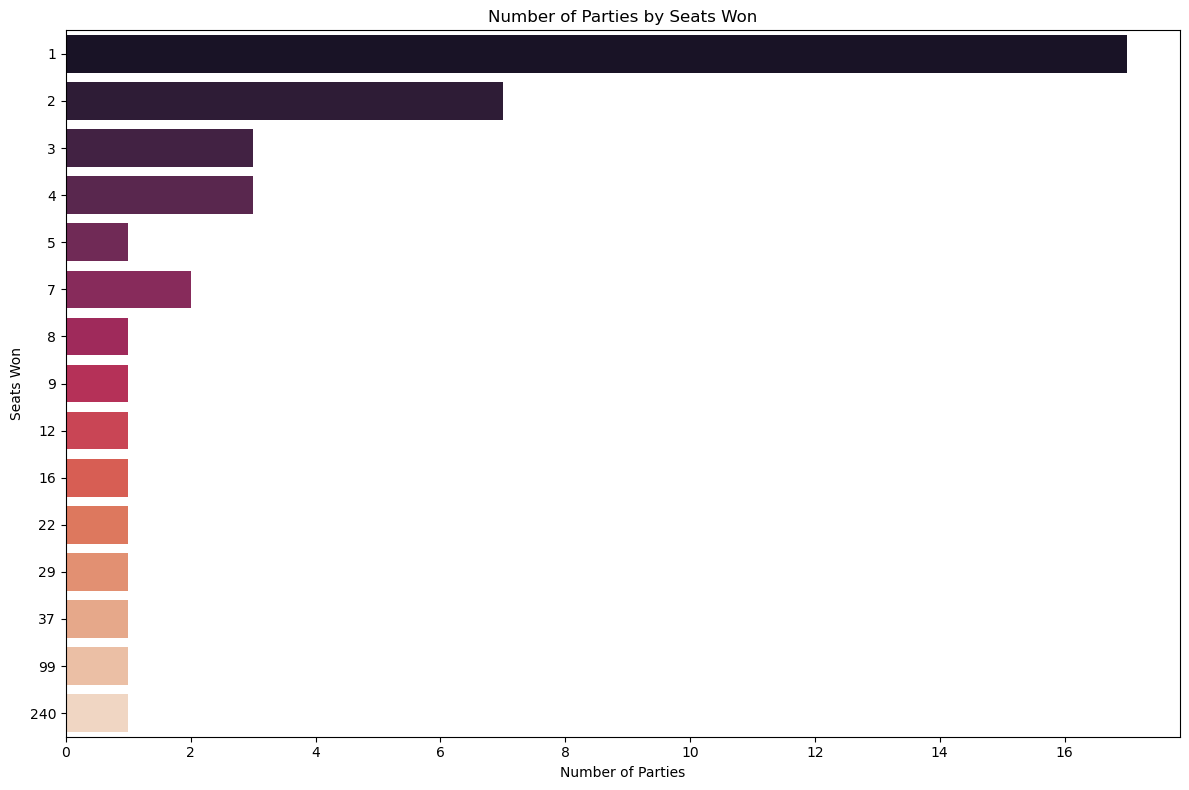

In [45]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Won', data=results, palette='rocket')
plt.ylabel('Seats Won')
plt.xlabel('Number of Parties')
plt.title('Number of Parties by Seats Won')
plt.tight_layout()
plt.show()


# Swarm Plot

/var/folders/lj/s2tb9t7518n0pd09r0x4qtzm0000gn/T/ipykernel_89243/3422628366.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x='Won', y='Party', data=results, palette='Set2')


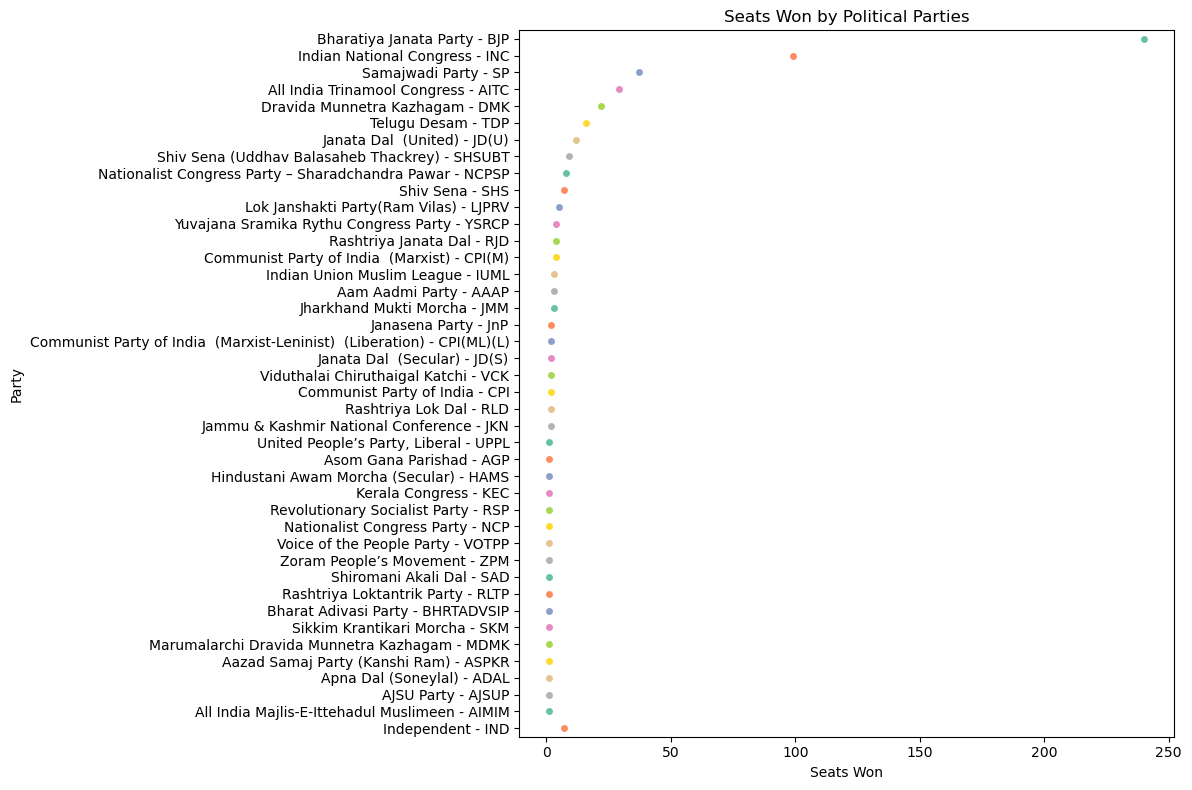

In [46]:
plt.figure(figsize=(12, 8))
sns.swarmplot(x='Won', y='Party', data=results, palette='Set2')
plt.xlabel('Seats Won')
plt.ylabel('Party')
plt.title('Seats Won by Political Parties')
plt.tight_layout()
plt.show()
